In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


В этом домашнем задании вам предстоит построить классификатор текстов.

Будем предсказывать эмоциональную окраску твиттов о коронавирусе.

Для каждого твитта указано:


*   UserName - имя пользователя, заменено на целое число для анонимности
*   ScreenName - отображающееся имя пользователя, заменено на целое число для анонимности
*   Location - местоположение
*   TweetAt - дата создания твитта
*   OriginalTweet - текст твитта
*   Sentiment - эмоциональная окраска твитта (целевая переменная)

# Задание 1 Подготовка (0.5 балла)

In [2]:
df = pd.read_csv('tweets_coronavirus.csv')
df.sample(4)

UserName  ScreenName Location     TweetAt  \
7129      12459       57411   Norway  20-03-2020   
23128     32056       77008   Canada  04-04-2020   
14082     20898       65850      USA  23-03-2020   
29882     40490       85442      NaN  09-04-2020   

                                           OriginalTweet           Sentiment  
7129   Prices surge past 500 for fish tank cleaner th...            Positive  
23128  @Pass_the_M I've had sushi and pizza for the f...  Extremely Positive  
14082  @DrDenaGrayson @NBA We need to start drive thr...            Negative  
29882  @GovMurphy why are food, esp meat prices so da...            Negative

In [3]:
df.Sentiment.unique()

array(['Positive', 'Extremely Negative', 'Negative', 'Extremely Positive'],
      dtype=object)

In [4]:
df['Emotion'] = [1 if x == 'Positive' or x == 'Extremely Positive' else 0 for x in df['Sentiment']]

In [5]:
df.head()

UserName  ScreenName                   Location     TweetAt  \
0      3800       48752                         UK  16-03-2020   
1      3801       48753                  Vagabonds  16-03-2020   
2      3802       48754                        NaN  16-03-2020   
3      3803       48755                        NaN  16-03-2020   
4      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  advice Talk to your neighbours family to excha...            Positive   
1  Coronavirus Australia: Woolworths to give elde...            Positive   
2  My food stock is not the only one which is emp...            Positive   
3  Me, ready to go at supermarket during the #COV...  Extremely Negative   
4  As news of the regionÂs first confirmed COVID...            Positive   

   Emotion  
0        1  
1        1  
2        1  
3        0  
4        1

In [6]:
df.drop('Sentiment', axis= 1 , inplace= True )

In [7]:
df.head()

UserName  ScreenName                   Location     TweetAt  \
0      3800       48752                         UK  16-03-2020   
1      3801       48753                  Vagabonds  16-03-2020   
2      3802       48754                        NaN  16-03-2020   
3      3803       48755                        NaN  16-03-2020   
4      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   

                                       OriginalTweet  Emotion  
0  advice Talk to your neighbours family to excha...        1  
1  Coronavirus Australia: Woolworths to give elde...        1  
2  My food stock is not the only one which is emp...        1  
3  Me, ready to go at supermarket during the #COV...        0  
4  As news of the regionÂs first confirmed COVID...        1

In [8]:
df.rename(columns={"Emotion": "Emotion"})

UserName  ScreenName                      Location     TweetAt  \
0          3800       48752                            UK  16-03-2020   
1          3801       48753                     Vagabonds  16-03-2020   
2          3802       48754                           NaN  16-03-2020   
3          3803       48755                           NaN  16-03-2020   
4          3804       48756     ÃT: 36.319708,-82.363649  16-03-2020   
...         ...         ...                           ...         ...   
33439     44949       89901                          OHIO  14-04-2020   
33440     44950       89902                           NaN  14-04-2020   
33441     44952       89904                           NaN  14-04-2020   
33442     44953       89905                           NaN  14-04-2020   
33443     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet  Emotion  
0      advice Talk to your neighbours family to excha...        1  
1      Coronavirus Australia: Woolworths to give elde...        1  
2      My food stock is not the only one which is emp...        1  
3      Me, ready to go at supermarket during the #COV...        0  
4      As news of the regionÂs first confirmed COVID...        1  
...                                                  ...      ...  
33439  I never that weÂd be in a situation &amp; wor...        1  
33440  @MrSilverScott you are definitely my man. I fe...        1  
33441  Response to complaint not provided citing COVI...        0  
33442  You know itÂs getting tough when @KameronWild...        1  
33443  @TartiiCat Well new/used Rift S are going for ...        0  

[33444 rows x 6 columns]

Преобразовали целевую переменную в бинарный вид

In [9]:
list(df.columns)

['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Emotion']

In [10]:
df['Emotion'].value_counts()

Emotion
1    18046
0    15398
Name: count, dtype: int64

In [11]:
15398/33443

0.4604252010884191

Присутствует дисбаланс классов, но он незначительный

In [12]:
#проверяем на пропуски
df.isnull().mean()

UserName         0.00000
ScreenName       0.00000
Location         0.21077
TweetAt          0.00000
OriginalTweet    0.00000
Emotion          0.00000
dtype: float64

In [13]:
#пропуски только в столбце Location. Заполним их Unknown:

In [14]:
df.fillna({'Location':' Unknown'}, inplace= True )

In [15]:
df.head()

UserName  ScreenName                   Location     TweetAt  \
0      3800       48752                         UK  16-03-2020   
1      3801       48753                  Vagabonds  16-03-2020   
2      3802       48754                    Unknown  16-03-2020   
3      3803       48755                    Unknown  16-03-2020   
4      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   

                                       OriginalTweet  Emotion  
0  advice Talk to your neighbours family to excha...        1  
1  Coronavirus Australia: Woolworths to give elde...        1  
2  My food stock is not the only one which is emp...        1  
3  Me, ready to go at supermarket during the #COV...        0  
4  As news of the regionÂs first confirmed COVID...        1

In [16]:
from sklearn.model_selection import train_test_split

#X = df.iloc[:, :-1]
#y = df.iloc[:, -1]
 

train, test = train_test_split(df, test_size=0.3, random_state=0)

In [17]:
train.shape

(23410, 6)

In [18]:
test.shape

(10034, 6)

## Задание 2 Токенизация (3 балла)

Постройте словарь на основе обучающей выборки и посчитайте количество встреч каждого токена с использованием самой простой токенизации - деления текстов по пробельным символам и приведение токенов в нижний регистр

In [19]:
text1 = ' '.join(train['OriginalTweet'].tolist())

In [20]:
#text1

In [21]:
from itertools import chain
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

wordlist = list(chain(*[word_tokenize(s) for s in sent_tokenize(text1)]))
print(Counter(wordlist))

Counter({'#': 42753, 'the': 24327, '.': 23226, 'to': 22920, ',': 17556, ':': 16478, 'and': 14322, 'https': 12921, 'of': 12904, '?': 11033, 'a': 11010, 'in': 10567, '@': 9959, 'for': 8228, 'coronavirus': 7866, 'is': 7243, 'are': 6907, 'I': 5870, 'on': 5423, 'you': 5276, '!': 4700, 'at': 4460, 'prices': 4293, 'food': 3881, 'this': 3819, 'that': 3794, 'with': 3756, 'have': 3699, 'store': 3687, 'supermarket': 3527, 'be': 3417, 'amp': 3341, 'it': 3245, 'COVID-19': 3220, 'as': 3202, 'grocery': 3131, 'people': 3071, ';': 3044, 'from': 2904, '&': 2718, '19': 2676, 'your': 2617, 'we': 2569, 'will': 2560, 'not': 2547, 'all': 2542, 'The': 2461, 'has': 2276, 'can': 2188, 'or': 2183, 'out': 2182, 'by': 2176, 'our': 2176, 'up': 2107, "'s": 2052, 'they': 1982, 'my': 1971, 'more': 1963, 'their': 1919, 'COVID19': 1868, 'shopping': 1837, 'but': 1784, 'during': 1751, 'consumer': 1713, 'about': 1705, 'Coronavirus': 1686, 'pandemic': 1663, 'do': 1649, 'online': 1638, 'get': 1634, 'who': 1605, 'COVID': 1603

In [22]:
#размер словаря
len(Counter(wordlist))

66925

Выведите 10 самых популярных токенов с количеством встреч каждого из них. Объясните, почему именно эти токены в топе

In [23]:
sorted_dict1 = sorted(Counter(wordlist).items(), key=lambda kv: kv[1], reverse=True)

In [24]:
sorted_dict1

[('#', 42753),
 ('the', 24327),
 ('.', 23226),
 ('to', 22920),
 (',', 17556),
 (':', 16478),
 ('and', 14322),
 ('https', 12921),
 ('of', 12904),
 ('?', 11033),
 ('a', 11010),
 ('in', 10567),
 ('@', 9959),
 ('for', 8228),
 ('coronavirus', 7866),
 ('is', 7243),
 ('are', 6907),
 ('I', 5870),
 ('on', 5423),
 ('you', 5276),
 ('!', 4700),
 ('at', 4460),
 ('prices', 4293),
 ('food', 3881),
 ('this', 3819),
 ('that', 3794),
 ('with', 3756),
 ('have', 3699),
 ('store', 3687),
 ('supermarket', 3527),
 ('be', 3417),
 ('amp', 3341),
 ('it', 3245),
 ('COVID-19', 3220),
 ('as', 3202),
 ('grocery', 3131),
 ('people', 3071),
 (';', 3044),
 ('from', 2904),
 ('&', 2718),
 ('19', 2676),
 ('your', 2617),
 ('we', 2569),
 ('will', 2560),
 ('not', 2547),
 ('all', 2542),
 ('The', 2461),
 ('has', 2276),
 ('can', 2188),
 ('or', 2183),
 ('out', 2182),
 ('by', 2176),
 ('our', 2176),
 ('up', 2107),
 ("'s", 2052),
 ('they', 1982),
 ('my', 1971),
 ('more', 1963),
 ('their', 1919),
 ('COVID19', 1868),
 ('shopping', 1

In [25]:
sorted_dict1[:10]

[('#', 42753),
 ('the', 24327),
 ('.', 23226),
 ('to', 22920),
 (',', 17556),
 (':', 16478),
 ('and', 14322),
 ('https', 12921),
 ('of', 12904),
 ('?', 11033)]

Именно эти токены в топе потому, что это знаки, предлоги. Они будут в топе почти в любом тексте. Если мы хотим увидеть содержательный топ слов, стоит смотреть дальше первых 10.

In [26]:
sorted_dict1[11:35]

[('in', 10567),
 ('@', 9959),
 ('for', 8228),
 ('coronavirus', 7866),
 ('is', 7243),
 ('are', 6907),
 ('I', 5870),
 ('on', 5423),
 ('you', 5276),
 ('!', 4700),
 ('at', 4460),
 ('prices', 4293),
 ('food', 3881),
 ('this', 3819),
 ('that', 3794),
 ('with', 3756),
 ('have', 3699),
 ('store', 3687),
 ('supermarket', 3527),
 ('be', 3417),
 ('amp', 3341),
 ('it', 3245),
 ('COVID-19', 3220),
 ('as', 3202)]

Здесь уже встречаются ожидаемые слова(coronavirus, prices, COVID-19 и др.)

Удалите стоп-слова из словаря и выведите новый топ-10 токенов (и количество встреч) по популярности. Что можно сказать о нем?

In [27]:
import nltk
from nltk.corpus import stopwords

In [28]:
stops = set(stopwords.words('english'))
print(stops)

{'won', "shan't", 'why', 'mightn', 'now', 'each', 'on', "didn't", "hadn't", 'the', 'ours', 'had', 'only', 'y', 'hers', 'into', 'he', 'me', "aren't", 'by', 'myself', 'so', 'during', 'hadn', 'shan', 'itself', 'to', 'them', 'wasn', 'is', 'nor', 'same', 'wouldn', 'both', "haven't", "hasn't", 'couldn', "weren't", 'were', 'ma', 'himself', 'shouldn', 'haven', 'herself', 'but', 'all', 'this', 'where', "won't", 'yourselves', "wasn't", 'doing', "mustn't", 'then', 'their', 'because', 'there', "it's", 'some', 'aren', 'as', 'once', 'did', 'than', 'we', 'here', 'off', 'yours', 'more', "that'll", 'while', "she's", 'below', 'hasn', 'own', 'ourselves', 'whom', 'at', 'yourself', 'from', 'too', 'an', 'these', "couldn't", 'until', 've', 'its', 'that', 'just', 'a', 'of', 'be', 'above', "you'll", "should've", 'am', 'with', 'about', 'are', 'any', 'very', 'will', 'having', 'or', 'further', 'i', 'most', 'her', 'theirs', 'in', 'no', 'been', 'do', 'such', 'should', 'and', 'before', 'again', 'under', 'can', 'o', 

In [29]:
#text = "NLTK помогает в удалении стоп-слов из текста."
#tokens = word_tokenize(text1)
#stop_words = set(stopwords.words('english'))
#filtered_tokens = [word for word in tokens if word not in stops]

#print(filtered_tokens)

In [30]:
dict1_without_stops = []
for word0 in sorted_dict1:
    if word0[0] not in stops:
        dict1_without_stops.append(word0)
        

In [31]:
dict1_without_stops

[('#', 42753),
 ('.', 23226),
 (',', 17556),
 (':', 16478),
 ('https', 12921),
 ('?', 11033),
 ('@', 9959),
 ('coronavirus', 7866),
 ('I', 5870),
 ('!', 4700),
 ('prices', 4293),
 ('food', 3881),
 ('store', 3687),
 ('supermarket', 3527),
 ('amp', 3341),
 ('COVID-19', 3220),
 ('grocery', 3131),
 ('people', 3071),
 (';', 3044),
 ('&', 2718),
 ('19', 2676),
 ('The', 2461),
 ("'s", 2052),
 ('COVID19', 1868),
 ('shopping', 1837),
 ('consumer', 1713),
 ('Coronavirus', 1686),
 ('pandemic', 1663),
 ('online', 1638),
 ('get', 1634),
 ('COVID', 1603),
 ('workers', 1591),
 (')', 1588),
 ('need', 1577),
 ('We', 1534),
 ('like', 1529),
 ("n't", 1514),
 ('-', 1480),
 ('Covid_19', 1464),
 ('panic', 1464),
 ('(', 1452),
 ('demand', 1431),
 ('...', 1403),
 ('time', 1336),
 ('help', 1308),
 ('sanitizer', 1228),
 ('go', 1215),
 ('home', 1183),
 ('hand', 1153),
 ('going', 1104),
 ("''", 1080),
 ('stock', 1051),
 ('crisis', 1033),
 ('buying', 1017),
 ('us', 1015),
 ('``', 991),
 ('This', 987),
 ('one', 955

In [32]:
len(dict1_without_stops)

66775

In [33]:
dict1_without_stops = sorted(dict1_without_stops, key=lambda kv: kv[1], reverse=True)

In [34]:
dict1_without_stops[:10] 

[('#', 42753),
 ('.', 23226),
 (',', 17556),
 (':', 16478),
 ('https', 12921),
 ('?', 11033),
 ('@', 9959),
 ('coronavirus', 7866),
 ('I', 5870),
 ('!', 4700)]

теперь больше пунктуационных знаков в топе, слова типа the ушли

Также выведите 20 самых непопулярных слов (если самых непопулярных слов больше выведите любые 20 из них) Почему эти токены непопулярны, требуется ли как-то дополнительно работать с ними?

In [35]:
#теперь выведем 20 самых непопулярных слов
dict1_without_stops[-20:]

[('ruins', 1),
 ('now.When', 1),
 ('milion', 1),
 ('Skellig', 1),
 ('SkelligSix18', 1),
 ('SkelligCoast2kms', 1),
 ('SouthKerry', 1),
 ('//t.co/zJcL195VQS', 1),
 ('srinivasiyc', 1),
 ('//t.co/IAEK4fWsgz', 1),
 ('Vile', 1),
 ('premiership', 1),
 ('non-playing', 1),
 ('subsidise', 1),
 ('playersÂ\x92', 1),
 ('renewing', 1),
 ('flew', 1),
 ('TorontoPearson', 1),
 ('680NEWS', 1),
 ('//t.co/7j2Y3rSld9', 1)]

Здесь в основном никнеймы/названия/ссылки, на них можно не обращать внимания

Теперь воспользуемся токенайзером получше - TweetTokenizer из библиотеки nltk. Примените его и посмотрите на топ-10 популярных слов. Чем он отличается от топа, который получался раньше? Почему?

In [36]:
from nltk.tokenize import TweetTokenizer

In [37]:
tw = TweetTokenizer()
tw.tokenize(text1)

['Why',
 'we',
 'still',
 'want',
 'to',
 'buy',
 'so',
 'much',
 'stuff',
 'during',
 'quarantine',
 'https://t.co/1m881CwFUv',
 '#shopping',
 '#Covid_19',
 '#Online',
 'With',
 'driving',
 'even',
 'more',
 'usage',
 'a',
 'strong',
 'strategy',
 'is',
 'critical',
 'now',
 'more',
 'then',
 'ever',
 'Luckily',
 'and',
 'April',
 '16',
 'webinar',
 'will',
 'dive',
 'into',
 'growing',
 'app',
 'awareness',
 'and',
 'targeting',
 'high',
 'lifetime',
 'value',
 'users',
 '@Canon_India',
 'I',
 'am',
 'very',
 'happy',
 '..',
 'Great',
 'job',
 'by',
 '@Canon_India',
 '#CanonForCommunity',
 'https://t.co/Z0intkS34x',
 'The',
 'U',
 '.',
 'S',
 'national',
 'debt',
 'will',
 'likely',
 'exceed',
 '$',
 '30',
 'Trillion',
 'after',
 'the',
 'unprecedented',
 'borrowing',
 'by',
 'the',
 'Trump',
 'administration',
 'and',
 'MnuchinÂ',
 '\x92',
 's',
 'Treasury',
 'during',
 'the',
 '#coronavirus',
 'crisis',
 '.',
 'The',
 'Federal',
 'Reserve',
 'could',
 'be',
 'doing',
 'much',
 'mor

In [38]:
counts_Tweet = Counter(tw.tokenize(text1))
counts_Tweet

Counter({'Why': 278,
         'we': 2412,
         'still': 705,
         'want': 455,
         'to': 22933,
         'buy': 744,
         'so': 1402,
         'much': 489,
         'stuff': 141,
         'during': 1753,
         'quarantine': 174,
         'https://t.co/1m881CwFUv': 1,
         '#shopping': 103,
         '#Covid_19': 1463,
         '#Online': 12,
         'With': 346,
         'driving': 70,
         'even': 588,
         'more': 1969,
         'usage': 24,
         'a': 11045,
         'strong': 129,
         'strategy': 34,
         'is': 7162,
         'critical': 137,
         'now': 1476,
         'then': 386,
         'ever': 213,
         'Luckily': 11,
         'and': 14354,
         'April': 184,
         '16': 48,
         'webinar': 57,
         'will': 2561,
         'dive': 11,
         'into': 664,
         'growing': 88,
         'app': 52,
         'awareness': 30,
         'targeting': 9,
         'high': 396,
         'lifetime': 6,
         'value':

Отсортируем этот словарь по убыванию:

In [39]:
counts_Tweet = sorted(counts_Tweet.items(), key=lambda kv: kv[1], reverse=True)

In [40]:
counts_Tweet[:10]

[('the', 24337),
 ('.', 24108),
 ('to', 22933),
 (',', 17571),
 ('and', 14354),
 ('of', 12904),
 ('a', 11045),
 ('in', 10573),
 ('?', 9524),
 ('for', 8228)]

топ-10 похож на топ из первой токенизации, но больше предлогов

Это обусловлено тем, что TweetTokenizer по другому обрабатывает смайлики, хештеги. Это удобно для анализа твитов.

Удалите из словаря стоп-слова и пунктуацию, посмотрите на новый топ-10 слов с количеством встреч, есть ли теперь в нем что-то не похожее на слова?

In [41]:
from string import punctuation

In [42]:
for pair in counts_Tweet:
    if pair[0] in punctuation:
        counts_Tweet.remove(pair)

In [43]:
cTweet_without_stops = []
for wordT in counts_Tweet:
    if wordT[0] not in stops:
        cTweet_without_stops.append(wordT)

In [44]:
cTweet_without_stops[:10]

[('19', 7167),
 ('#coronavirus', 7143),
 ('I', 5235),
 ('\x92', 4372),
 ('prices', 4281),
 ('COVID', 4218),
 ('food', 3795),
 ('store', 3691),
 ('supermarket', 3373),
 ('grocery', 3083)]

Топ-10 слов стал более анализируемым. Теперь здесь боьшинство слов связаны с пандемией и карантином

Удалите из словаря токены из одного символа, с позицией в таблице Unicode 128 и более (ord(x) >= 128)

Выведите топ-10 самых популярных и топ-20 непопулярных слов. Чем полученные топы отличаются от итоговых топов, полученных при использовании токенизации по пробелам? Что теперь лучше, а что хуже?

Теперь удалим токены из 1 символа и токены ord>=128:

In [45]:
cTweet_without_stops_128 = []
for word128 in cTweet_without_stops:
    if word128[0].isascii() == True and len(word128[0]) != 1 :
        cTweet_without_stops_128.append(word128)
        

In [46]:
len(cTweet_without_stops_128)

66606

In [47]:
cTweet_without_stops_128 = sorted(cTweet_without_stops_128, key=lambda kv: kv[1], reverse=True)

In [48]:
cTweet_without_stops_128[:10] #10 самых популярных после сортировки

[('19', 7167),
 ('#coronavirus', 7143),
 ('prices', 4281),
 ('COVID', 4218),
 ('food', 3795),
 ('store', 3691),
 ('supermarket', 3373),
 ('grocery', 3083),
 ('people', 3047),
 ('The', 2516)]

In [49]:
stopwords.words('english').append('is')

In [50]:
cTweet_without_stops_128[-20:] #20 самых непопулярных после сортировки

[('https://t.co/5cBLIqZX7L', 1),
 ('ruins', 1),
 ('now.When', 1),
 ('milion', 1),
 ('Skellig', 1),
 ('@SkelligSix18', 1),
 ('#SkelligCoast2kms', 1),
 ('#SouthKerry', 1),
 ('https://t.co/zJcL195VQS', 1),
 ('@srinivasiyc', 1),
 ('https://t.co/IAEK4fWsgz', 1),
 ('Vile', 1),
 ('premiership', 1),
 ('non-playing', 1),
 ('subsidise', 1),
 ('renewing', 1),
 ('flew', 1),
 ('@TorontoPearson', 1),
 ('@680NEWS', 1),
 ('https://t.co/7j2Y3rSld9', 1)]

Сравнивая эти топы с топами, полученными при использовании токенизации по пробелам, можно сказать, что топы, полученные с помощью TweetTokenizer с фильтрацией пунктуации и фильтрацией по количеству символов, лучше подходят для анализа твитов, так как наполнены релевантнами периоду пандемии словами. С другой стороны, если например стоит задача анализа употребления людьми предлогов или пунктуационных знаков, то стоит использовать самую простую токенизацию и не фильтровать словарь слов.

Выведите топ-10 популярных хештегов с количеством встреч. Что можно сказать о них?

In [51]:
#выведем топ хештэгов:
hashtags = []
for word_7 in cTweet_without_stops_128:
    if word_7[0].startswith("#"):
        hashtags.append(word_7)

In [52]:
hashtags = sorted(hashtags, key=lambda kv: kv[1], reverse=True)

In [53]:
hashtags[:10]

[('#coronavirus', 7143),
 ('#COVID19', 1844),
 ('#Covid_19', 1463),
 ('#Coronavirus', 1281),
 ('#COVID2019', 927),
 ('#toiletpaper', 657),
 ('#covid19', 568),
 ('#COVID', 542),
 ('#CoronaCrisis', 426),
 ('#CoronaVirus', 351)]

9 из 10 хэштегов связаны напрямую с упоминанием COVID. Это логично, так как в датасете собраны твиты о коронавирусе.

То же самое проделайте для ссылок на сайт https://t.co Сравнима ли популярность ссылок с популярностью хештегов? Будет ли информация о ссылке на конкретную страницу полезна?

In [54]:
#выведем топ ссылок на сайт:
links = []
for word_li in cTweet_without_stops_128:
    if word_li[0].startswith("https://t.co"):
        links.append(word_li)
links = sorted(links, key=lambda kv: kv[1], reverse=True)
links[:10]

[('https://t.co/oXA7SWtoNd', 5),
 ('https://t.co/gP3EusapL8', 4),
 ('https://t.co/WrLHYzIzAA', 3),
 ('https://t.co/kuwIpF1KQW', 3),
 ('https://t.co/zjNRx6dKKN', 3),
 ('https://t.co/3GBBDpdjat', 3),
 ('https://t.co/e2ZNXajPre', 3),
 ('https://t.co/CATKegAyOY', 3),
 ('https://t.co/G63RP042HO', 3),
 ('https://t.co/AZIqCdgrNn', 3)]

Популярность ссылок несравнима с популярностью хештэгов. Хештэги популярнее в тысячи раз. Это объясняется тем, что ссылка нужна только когда человек хочет поделиться материалами со стороннего ресурса(это редко в твитах), а хештэг можно добавить к любому посту(причем не обязательно 1). С помощтю хештэгов люди задают тему своего поста, а также помещают пост в подборки по хештэгам.

Информация о ссылке на конкретную страницу будет полезна, если например по текту твита не удается определить эмоциональный окрас твита. Перейдя по ссылке можно понять, что хотел сказать автор твита.

Используем опыт предыдущих экспериментов и напишем собственный токенайзер, улучшив TweetTokenizer. Функция tokenize должна:



*   Привести текст в нижний регистр
*   Применить TweetTokenizer для изначального выделения токенов
*   Удалить стоп-слова, пунктуацию, токены из одного символа, с позицией в таблице Unicode 128 и более и ссылки на t.co

In [55]:
#пишем свой токенайзер:

In [56]:
def custom_tokenizer(text):

     #приводим текст в нижний регистр
    text = text.lower()
    
    
     #применяем TweetTokenizer
    twT = TweetTokenizer()
    text_TT = twT.tokenize(text)
  
    
     #чистим текст
    for slovo in text_TT:
         if slovo in stopwords.words('english'):
             text_TT.remove(slovo)    
    for slovo in text_TT:
         if slovo in punctuation:
             text_TT.remove(slovo)
    
    for slovo in text_TT:
         if slovo.isascii() != True or len(slovo) == 1:
             text_TT.remove(slovo)
    for slovo in text_TT:
         if slovo.startswith("https://t.co/"):
             text_TT.remove(slovo)
    for slovo in text_TT:
         if slovo == '\x92':
             text_TT.remove(slovo)        
            
        
                       
        
    

    return text_TT


In [57]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['is', 'sample', 'text', '@sample_text', '#sampletext']

In [58]:
#не понимаю, почему is не убрался, хотя он есть в списке стоп слов:(

## Задание 3 Векторизация текстов (2 балла)

Обучите CountVectorizer с использованием custom_tokenizer в качестве токенайзера. Как размер полученного словаря соотносится с размером изначального словаря из начала задания 2?

In [61]:
text1

'Why we still want to buy so much stuff during quarantine https://t.co/1m881CwFUv #shopping #Covid_19 #Online With driving even more usage a strong strategy is critical now more then ever Luckily and April 16 webinar will dive into growing app awareness and targeting high lifetime value users @Canon_India I am very happy.. Great job by @Canon_India #CanonForCommunity\r\r\nhttps://t.co/Z0intkS34x The U.S national debt will likely exceed $30 Trillion after the unprecedented borrowing by the Trump administration and MnuchinÂ\x92s Treasury during the #coronavirus crisis. The Federal Reserve could be doing much more to cushion the blow. U.S is a consumer led economy on the brink. Finally got to the grocery store. Honestly, what are you people doing with all the toilet paper? #coronavirus https://t.co/JmoBv8z0U0 Friends: Catholic University\'s food service workers have been laid off without pay. (By contrast, Georgetown has set an example more consistent with Catholic Social Teaching.) Pleas

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer = custom_tokenizer)
bow = cv.fit(train['OriginalTweet']) # bow — bag of words (мешок слов)
#bow_test = cv.transform(test)

#scaler = MaxAbsScaler()
#bow = scaler.fit_transform(bow)
#bow_test = scaler.transform(bow_test)

print(len(cv.vocabulary_))

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


45728


Посмотрим на какой-нибудь конкретный твитт:

In [60]:
ind = 9023
train.iloc[ind]['OriginalTweet'], train.iloc[ind]['Emotion']

('Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs',
 0)

Автор твитта не доволен ситуацией с едой во Франции и текст имеет резко негативную окраску.

Примените обученный CountVectorizer для векторизации данного текста, и попытайтесь определить самый важный токен и самый неважный токен (токен, компонента которого в векторе максимальна/минимальна, без учета 0). Хорошо ли они определились, почему?

In [71]:
#fr_str = str(train.iloc[ind]['OriginalTweet'])

In [72]:
#fr_str

In [73]:
#fr = fr_str.split()

In [74]:
#france = bow.fit_transform(fr)

In [78]:
from sklearn.preprocessing import MaxAbsScaler

In [75]:
#bow_test = cv.transform(fr)

#scaler = MaxAbsScaler()
#bow = scaler.fit_transform(bow)
#bow_test = scaler.transform(fr)

In [162]:
#france

In [163]:
#print(france)

In [65]:
#text1.split('.')

In [76]:
#train

In [84]:
train['OriginalTweet'][9023]

"Shop keepers taking advantage of #Coronavirus boosting prices disproportionately so the most Marginalised suffer who can't afford it #SHAMEONYOU #Wewillremember"

Применим обученный векторайзер для векторизации твита про Францию:

In [86]:
france_post = train.iloc[ind]['OriginalTweet']

In [87]:
test_l = []
test_l.append(france_post)

In [89]:
france_1 = cv.transform(test_l)

#scaler = MaxAbsScaler()
#bow = scaler.fit_transform(bow)
#france_1 = scaler.transform(france_1)

In [90]:
france_1

<1x45728 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [91]:
list(cv.vocabulary_.items())[:10]

[('we', 44831),
 ('still', 41608),
 ('want', 44721),
 ('buy', 20774),
 ('much', 34233),
 ('stuff', 41823),
 ('quarantine', 37775),
 ('#shopping', 7449),
 ('#covid_19', 2039),
 ('#online', 5960)]

In [92]:
print(france_1)

  (0, 0)	1
  (0, 1816)	1
  (0, 2024)	1
  (0, 16513)	1
  (0, 20350)	1
  (0, 26277)	1
  (0, 26649)	1
  (0, 26835)	1
  (0, 32328)	1
  (0, 34758)	1
  (0, 35351)	1
  (0, 35907)	1
  (0, 37027)	1
  (0, 37815)	1
  (0, 40431)	1


В этом сообщении каждое слово встречается не более одного раза, поэтому векторайзер выдаёт единицы. Значит, здесь каждого слова из тех, что есть в твите, важность одинаковая.

Теперь примените TfidfVectorizer и определите самый важный/неважный токены. Хорошо ли определились, почему?

**Теперь применим Tfidf:**

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [96]:
Tf_Idf = TfidfVectorizer(ngram_range=(1, 1))
tf_train = Tf_Idf.fit(train['OriginalTweet'])


In [97]:
print(len(Tf_Idf.vocabulary_))

52803


In [98]:
france_tf = Tf_Idf.transform(test_l)

In [99]:
france_tf

<1x52803 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [100]:
print(france_tf)

  (0, 42440)	0.30203356606708864
  (0, 42038)	0.23939641380986615
  (0, 37817)	0.34796756143689067
  (0, 36309)	0.2504165018008069
  (0, 34637)	0.14242149357720232
  (0, 33689)	0.1591245400461617
  (0, 32641)	0.12715158197633206
  (0, 32233)	0.24934088837073284
  (0, 27658)	0.29578909426242755
  (0, 23778)	0.07720780744802226
  (0, 19169)	0.30341116125035644
  (0, 18928)	0.08605723400414655
  (0, 18817)	0.1097872602550264
  (0, 18173)	0.31662019798552826
  (0, 12346)	0.1652234982924507
  (0, 11979)	0.22177762147152172
  (0, 8847)	0.1333423763630868
  (0, 8251)	0.37980260115138875


Здесь дробные числа,так как количество встреч слова делится на количество слов в твите.

In [101]:
test_l

['Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs']

In [103]:
tf_data = pd.DataFrame(france_tf.toarray(), columns=Tf_Idf.get_feature_names_out())

In [104]:
tf_data.loc[:, (tf_data != 0).all()]

brainless       but  coronavirusoutbreak  covid2019      ffs      food  \
0   0.379803  0.133342             0.221778   0.165223  0.31662  0.109787   

        for    france        in      lets      nice       not       one  \
0  0.086057  0.303411  0.077208  0.295789  0.249341  0.127152  0.159125   

      panic       ppl  queueing      show   skynews  
0  0.142421  0.250417  0.347968  0.239396  0.302034

самым важным токеном по мнению векторайзера оказалось слово brainless. Это разумно и правильно, так как с точки зрения влияния на определение позитивный или негативный окрас имеет твит это слово здесь самое важное.

самым неважным токеном оказалось слово in. Это тоже имеет смысл, так как предлог может быть в предложении любой тональности и не поможет определить тональность.

**Найдите какой-нибудь положительно окрашенный твитт, где TfidfVectorizer хорошо (полезно для определения окраски) выделяет важный токен, поясните пример.**

Подсказка: явно положительные твитты можно искать при помощи положительных слов (good, great, amazing и т. д.)

**Возьмем такой твит**:

In [106]:
train

UserName  ScreenName                        Location     TweetAt  \
25621     35178       80130                         Unknown  06-04-2020   
30135     40819       85771                   Boston, MA HQ  10-04-2020   
28899     39249       84201                           India  09-04-2020   
5989      11068       56020             Mayfair, London, UK  19-03-2020   
4367       9109       54061                             WNC  18-03-2020   
...         ...         ...                             ...         ...   
20757     29120       74072                         Unknown  31-03-2020   
32103     43291       88243  Waterville, Ireland Austin, TX  13-04-2020   
30403     41159       86111            Mumbai , Delhi India  10-04-2020   
21243     29702       74654                         Unknown  01-04-2020   
2732       7104       52056                         Unknown  18-03-2020   

                                           OriginalTweet  Emotion  
25621  Why we still want to buy so much stuff during ...        1  
30135  With driving even more usage a strong strategy...        1  
28899  @Canon_India I am very happy.. Great job by @C...        1  
5989   The U.S national debt will likely exceed $30 T...        0  
4367   Finally got to the grocery store. Honestly, wh...        1  
...                                                  ...      ...  
20757  Football is in ruins right now.When it will re...        0  
32103  Hand sanitizer made here on the Skellig Coast!...        1  
30403  An initiative  taken by our  @GOLDENINITIATI1 ...        1  
21243  Vile premiership players demanding full wages ...        0  
2732   Just wondering why we arenÂt screening at the...        1  

[23410 rows x 6 columns]

In [204]:
df_positive = train[train['OriginalTweet'].str.contains("good") | df['OriginalTweet'].str.contains('great') | df['OriginalTweet'].str.contains('amazing')] 
print(df_positive) 

       UserName  ScreenName              Location     TweetAt  \
29231     39667       84619               Unknown  09-04-2020   
21541     30079       75031               Unknown  02-04-2020   
20314     28576       73528      New Delhi, India  27-03-2020   
7239      12591       57543  Melbourne, Australia  20-03-2020   
192        4035       48987         San Diego, CA  16-03-2020   
...         ...         ...                   ...         ...   
18819     26706       71658           Chicago, IL  25-03-2020   
19129     27077       72029             hyderabad  25-03-2020   
3219       7692       52644  Brisbane, Queensland  18-03-2020   
7599      13021       57973         Ann Arbor, MI  20-03-2020   
18430     26221       71173               Unknown  25-03-2020   

                                           OriginalTweet  Emotion  
29231  @theprojecttv @mrbenjaminlaw It's not okay to ...        0  
21541  To all my marketers friends, this is a very go...        1  
20314  India on

C:\Users\Gavrin Gleb\AppData\Local\Temp\ipykernel_4860\1850013450.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_positive = train[train['OriginalTweet'].str.contains("good") | df['OriginalTweet'].str.contains('great') | df['OriginalTweet'].str.contains('amazing')]


In [205]:
train['OriginalTweet'][9930]

'We ve got breaking news tonight from out of Los Angeles Working long hours at great risk of exposure thousands of grocery store workers are being recognized as essential with hazard pay during'

In [206]:
print(df_positive.sample(17))

       UserName  ScreenName                 Location     TweetAt  \
1162       5208       50160               Austin, TX  17-03-2020   
19202     27169       72121          Los Angeles, CA  26-03-2020   
19466     27498       72450           Lucknow, India  26-03-2020   
20567     28900       73852                  Unknown  30-03-2020   
1367       5455       50407          California, USA  17-03-2020   
12796     19314       64266  Llansannan, Wales Cymru  22-03-2020   
7541      12948       57900                   Rwanda  20-03-2020   
12991     19555       64507  England, United Kingdom  22-03-2020   
31662     42744       87696                Tulsa, OK  12-04-2020   
31278     42275       87227            United States  11-04-2020   
19845     27984       72936            Colorado, USA  26-03-2020   
30114     40793       85745               Newark, NJ  10-04-2020   
28106     38262       83214            Boston, Mass.  08-04-2020   
9640      15507       60459           Warsaw, Po

**Возьмем такой твит:**

In [116]:
train['OriginalTweet'][9930]

'We ve got breaking news tonight from out of Los Angeles Working long hours at great risk of exposure thousands of grocery store workers are being recognized as essential with hazard pay during'

In [208]:
train['OriginalTweet'][31278]

'Have a great weekend. Stay safe and happy.Things will get better soon. #coronavirus #toiletpaper #SocialDistancing #TogetherAtHome #SaturdayMorning https://t.co/kb37v4FnT5'

он положителен. Протестируем на нем TfIdf:

In [209]:
posi_post = train['OriginalTweet'][31278]

In [210]:
test_posi = []
test_posi.append(posi_post)

In [211]:
test_posi

['Have a great weekend. Stay safe and happy.Things will get better soon. #coronavirus #toiletpaper #SocialDistancing #TogetherAtHome #SaturdayMorning https://t.co/kb37v4FnT5']

In [212]:
posi_tf = Tf_Idf.transform(test_posi)

In [213]:
posi_tf

<1x52803 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [214]:
print(posi_tf)

  (0, 50446)	0.13638054241763287
  (0, 50014)	0.2827174849442504
  (0, 46363)	0.18249991901836451
  (0, 46350)	0.3750355652121609
  (0, 45926)	0.21268972822885088
  (0, 43621)	0.1792990405068744
  (0, 42953)	0.24008784767892485
  (0, 42778)	0.2023873885451656
  (0, 40791)	0.3385277880637832
  (0, 40479)	0.19028621437810309
  (0, 26151)	0.4265800559017526
  (0, 22879)	0.0736294083681652
  (0, 21780)	0.12087062908361926
  (0, 21646)	0.2605926470764674
  (0, 20925)	0.20637973974434493
  (0, 20112)	0.15065372672941585
  (0, 11895)	0.07796442964110242
  (0, 10901)	0.07349415934653536
  (0, 7286)	0.2205566110913751
  (0, 5117)	0.07342477543892939


In [215]:
tf_posi_data = pd.DataFrame(posi_tf.toarray(), columns=Tf_Idf.get_feature_names_out())

In [216]:
tf_posi_data.loc[:, (tf_posi_data != 0).all()]

and    better        co  coronavirus       get    great     happy  \
0  0.073425  0.220557  0.073494     0.077964  0.150654  0.20638  0.260593   

       have     https  kb37v4fnt5      safe  saturdaymorning  \
0  0.120871  0.073629     0.42658  0.190286         0.338528   

   socialdistancing      soon      stay   things  togetherathome  toiletpaper  \
0          0.202387  0.240088  0.179299  0.21269        0.375036       0.1825   

    weekend      will  
0  0.282717  0.136381

In [217]:
tf_posi_data.iloc[0].idxmax()

'kb37v4fnt5'

In [241]:
df_good = train[train['OriginalTweet'].apply(lambda x: 'amazing' in x) & (train['Emotion'] == 1)]

In [242]:
df_good.sample(19)

UserName  ScreenName                        Location     TweetAt  \
19853     27993       72945                 London, England  26-03-2020   
6074      11177       56129              Ottawa Hills, Ohio  19-03-2020   
8882      14590       59542                       Scotland.  20-03-2020   
11636     17911       62863                       Australia  21-03-2020   
23018     31918       76870               Karachi, Pakistan  04-04-2020   
20210     28443       73395                       Melbourne  27-03-2020   
19919     28079       73031          Newbury, Berkshire, UK  26-03-2020   
19172     27135       72087             Adelaide, Australia  26-03-2020   
469        4365       49317                         TaÃ¯wan  16-03-2020   
20175     28397       73349                 Kampala, Uganda  26-03-2020   
18271     26029       70981  Abubakar koko road, Abuja Nige  25-03-2020   
32078     43261       88213                    Brooklyn, NY  13-04-2020   
20623     28965       73917            Regina, Saskatchewan  30-03-2020   
32176     43376       88328                 Los Angeles, CA  13-04-2020   
31956     43106       88058                Oconto Falls, WI  12-04-2020   
8234      13803       58755                         Unknown  20-03-2020   
25263     34743       79695        2828 Dundas St W Toronto  06-04-2020   
8851      14552       59504                         Unknown  20-03-2020   
7243      12595       57547                         Unknown  20-03-2020   

                                           OriginalTweet  Emotion  
19853  I donÂt think weÂll ever hear anyone ever sa...        1  
6074   #SickLeave #Petition | #Kroger is the largest ...        1  
8882   Rather than buying (and hoarding) that extra 2...        1  
11636  Margot Robbie is an amazing actress, and love ...        1  
23018  Face Mask (Pack of 5) Â Meeting the need of h...        1  
20210  Australian prices could fall by 20 That s if t...        1  
19919  The amazing and have managed to get production...        1  
19172  @markbritnell Agreed, in a month itÂs amazing...        1  
469    #COVID19 19 A friend of mine in the US works a...        1  
20175  @DailyMonitor Xente is an amazing online shopp...        1  
18271  Why not stay home and be safe?\r\r\n\r\r\nWhil...        1  
32078  Late at night 2 00 and is amazing how on every...        1  
20623  Three amazing stations. One incredible lead gi...        1  
32176  For a limited time, you can help support the A...        1  
31956  Got this sticker with my @ZaturalHemp order of...        1  
8234   Do something amazing tomorrow, save lives by d...        1  
25263  Sending a shipment ?? of our hand #sanitizer t...        1  
8851   With everything going on with 19 shopping onli...        1  
7243   @TheLastLeg #IsItOk that this how I imagine it...        1

In [250]:
good_post = df_good['OriginalTweet'][8234]

In [251]:
good_post

"Do something amazing tomorrow, save lives by donating some of your hand gel to pensioners in your local supermarket so they don't have to risk contracting the coronavirus from contaminated shopping trolley and basket handles. Be sure to use a fully extended arm ?\r\r\n#CoronaCrisis"

In [252]:
test_good = []
test_good.append(good_post)

In [253]:
good_tf = Tf_Idf.transform(test_good)
tf_good_data = pd.DataFrame(good_tf.toarray(), columns=Tf_Idf.get_feature_names_out())
tf_good_data.loc[:, (tf_good_data != 0).all()]

amazing       and       arm    basket        be        by  contaminated  \
0  0.185203  0.051661  0.256598  0.215673  0.086478  0.099072      0.239942   

   contracting  coronacrisis  coronavirus  ...  something  supermarket  \
0      0.21812      0.143477     0.054855  ...   0.164462     0.080626   

       sure       the      they        to  tomorrow   trolley       use  \
0  0.155572  0.041954  0.098864  0.129138  0.181371  0.207541  0.136302   

       your  
0  0.193255  

[1 rows x 40 columns]

In [254]:
tf_good_data.iloc[0].idxmax()

'pensioners'

В этом примере Векторайзер выделяет важные для тональности текста токены большим весом: pensioners связано с помощью пенсионерам, также большой вес придаётся токенам arm, amazing, так как они с большей вероятностью указывают на положительный тон текста 

## Задание 4 Обучение первых моделей (1 балл)

Примените оба векторайзера для получения матриц с признаками текстов. Выделите целевую переменную.

Получим матрицы с помощью метода get_feature_names_out

In [261]:
train_tweets = train['OriginalTweet'].tolist()
        
        

In [262]:
train_tweets

['Why we still want to buy so much stuff during quarantine https://t.co/1m881CwFUv #shopping #Covid_19 #Online',
 'With driving even more usage a strong strategy is critical now more then ever Luckily and April 16 webinar will dive into growing app awareness and targeting high lifetime value users',
 '@Canon_India I am very happy.. Great job by @Canon_India #CanonForCommunity\r\r\nhttps://t.co/Z0intkS34x',
 'The U.S national debt will likely exceed $30 Trillion after the unprecedented borrowing by the Trump administration and MnuchinÂ\x92s Treasury during the #coronavirus crisis. The Federal Reserve could be doing much more to cushion the blow. U.S is a consumer led economy on the brink.',
 'Finally got to the grocery store. Honestly, what are you people doing with all the toilet paper? #coronavirus https://t.co/JmoBv8z0U0',
 "Friends: Catholic University's food service workers have been laid off without pay. (By contrast, Georgetown has set an example more consistent with Catholic Soc

In [263]:
len(train_tweets)

23410

In [264]:

tf_for_matrix = Tf_Idf.transform(train_tweets)
Tf_Idf.get_feature_names_out()

array(['00', '000', '0000', ..., 'zâ', 'â²', 'ã¼berweist'], dtype=object)

In [265]:
print(tf_for_matrix.shape)

(23410, 52803)


In [266]:
#то же самое для count vectorizer
cv_for_matrix = cv.transform(train_tweets)
cv.get_feature_names_out()

array(['!', '"', '#', ..., '¼', '½', 'â'], dtype=object)

In [267]:
print(cv_for_matrix.shape)

(23410, 45728)


Целевая переменная - это Emotion

In [270]:
y_train = train['Emotion']

In [271]:
y_test = test['Emotion']

Обучите логистическую регрессию на векторах из обоих векторайзеров. Посчитайте долю правильных ответов на обучающих и тестовых данных. Какой векторайзер показал лучший результат? Что можно сказать о моделях?

In [272]:
#на основе семинарского ноутбука
count_vec = CountVectorizer(tokenizer = custom_tokenizer)
bow_cv = count_vec.fit_transform(train['OriginalTweet']) # bow — bag of words (мешок слов)
bow_cv_test = count_vec.transform(test['OriginalTweet'])

scaler = MaxAbsScaler()
bow_cv = scaler.fit_transform(bow_cv)
bow_cv_test = scaler.transform(bow_cv_test)

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [273]:
list(count_vec.vocabulary_.items())[:10]

[('we', 44831),
 ('still', 41608),
 ('want', 44721),
 ('buy', 20774),
 ('much', 34233),
 ('stuff', 41823),
 ('quarantine', 37775),
 ('#shopping', 7449),
 ('#covid_19', 2039),
 ('#online', 5960)]

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [277]:
from sklearn.metrics import classification_report, roc_auc_score

**Обучаем логистическую регрессию для Count Vectorizer**

In [278]:
clf_cv = LogisticRegression(max_iter=200, random_state=42)
clf_cv.fit(bow_cv, y_train)
pred = clf_cv.predict(bow_cv_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4552
           1       0.86      0.89      0.87      5482

    accuracy                           0.86     10034
   macro avg       0.86      0.86      0.86     10034
weighted avg       0.86      0.86      0.86     10034



Метрики качества модели на тестовых данных говорят о хорошем качестве модели. f1, precision, recall >0.8, значит модель обучилась хорошо

**Обучаем логистическую регрессию для Tfidf Vectorizer**

In [279]:
Tf_vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer = custom_tokenizer)
Tf_train = Tf_vec.fit_transform(train['OriginalTweet'])
Tf_test = Tf_vec.transform(test['OriginalTweet'])


scaler = MaxAbsScaler()
Tf_train = scaler.fit_transform(Tf_train)
Tf_test = scaler.transform(Tf_test)

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [280]:
clf_Tf = LogisticRegression(max_iter=300, random_state=42)
clf_Tf.fit(Tf_train, y_train)
pred_tfidf = clf_Tf.predict(Tf_test)
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4552
           1       0.86      0.88      0.87      5482

    accuracy                           0.86     10034
   macro avg       0.86      0.86      0.86     10034
weighted avg       0.86      0.86      0.86     10034



Метрики качества у лог регрессий, обученных на основе двух разных векторайзеров, почти одинаковые. 

# Задание 5 Стэмминг 

Для уменьшения словаря можно использовать стемминг.

Модифицируйте написанный токенайзер, добавив в него стемминг с использованием SnowballStemmer. Обучите Count- и Tfidf- векторайзеры. Как изменился размер словаря?

In [281]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def custom_stem_tokenizer(text):
  # -- YOUR CODE HERE --
  return tokens

In [287]:
def custom_stem_tokenizer(text):

     #приводим текст в нижний регистр
    text = text.lower()
    
    
     #применяем TweetTokenizer
    twT = TweetTokenizer()
    tokens = twT.tokenize(text)
  
    
     #чистим текст
    for slovo in tokens:
         if slovo in stopwords.words('english'):
             tokens.remove(slovo)    
    for slovo in tokens:
         if slovo in punctuation:
             tokens.remove(slovo)
            
    #применяем стэмминг:
    stemmer = SnowballStemmer('english')

    tokens = [stemmer.stem(slovo) for slovo in tokens]
        
    
    for slovo in tokens:
         if slovo.isascii() != True or len(slovo) == 1:
             tokens.remove(slovo)
    for slovo in tokens:
         if slovo.startswith("https://t.co/"):
             tokens.remove(slovo)
    for slovo in tokens:
         if slovo == '\x92':
             tokens.remove(slovo)
    for slovo in tokens:
         if slovo == 'is':
             tokens.remove(slovo)        
            
        
                       
        
    

    return tokens


In [288]:
custom_stem_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [289]:
cv_stem = CountVectorizer(tokenizer = custom_stem_tokenizer)
bow_stem = cv_stem.fit(train['OriginalTweet']) # bow — bag of words (мешок слов)
#bow_test = cv.transform(test)

#scaler = MaxAbsScaler()
#bow = scaler.fit_transform(bow)
#bow_test = scaler.transform(bow_test)

print(len(cv_stem.vocabulary_))

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


37016


Размер словаря существенно уменьшился

теперь обучим с новым токенайзером Tfidf векторайзер:

In [290]:
Tf_Idf_stem = TfidfVectorizer(tokenizer = custom_stem_tokenizer)
tf_train_stem = Tf_Idf_stem.fit(train['OriginalTweet'])
print(len(Tf_Idf_stem.vocabulary_))

37016


Обучите логистическую регрессию с использованием обоих векторайзеров. Изменилось ли качество? Есть ли смысл применять стемминг?

Теперь обучим лог регрессии с новым токенайзером:

In [291]:
#count_vec_stem = CountVectorizer(tokenizer = custom_tokenizer)
bow_cv_stem = cv_stem.fit_transform(train['OriginalTweet']) # bow — bag of words (мешок слов)
bow_cv_test_stem = cv_stem.transform(test['OriginalTweet'])

scaler = MaxAbsScaler()
bow_cv_stem = scaler.fit_transform(bow_cv_stem)
bow_cv_test_stem = scaler.transform(bow_cv_test_stem)

In [332]:
bow_cv_stem.shape

(23410, 37016)

In [333]:
bow_cv_test_stem.shape

(10034, 37016)

In [293]:
#с помощью Count Vectorizer:
clf_cv_stem = LogisticRegression(max_iter=200, random_state=42)
clf_cv_stem.fit(bow_cv_stem, y_train)
pred_cv_stem = clf_cv_stem.predict(bow_cv_test_stem)
print(classification_report(y_test, pred_cv_stem))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4552
           1       0.86      0.89      0.88      5482

    accuracy                           0.86     10034
   macro avg       0.86      0.86      0.86     10034
weighted avg       0.86      0.86      0.86     10034



Изменения почти не видны(только +0.01 в f1)

In [294]:
#Tf_vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer = custom_tokenizer)
Tf_train_stem = Tf_Idf_stem.fit_transform(train['OriginalTweet'])
Tf_test_stem = Tf_Idf_stem.transform(test['OriginalTweet'])


scaler = MaxAbsScaler()
Tf_train_stem = scaler.fit_transform(Tf_train_stem)
Tf_test_stem = scaler.transform(Tf_test_stem)

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [295]:
#с помощью Tfidf:
clf_tf_stem = LogisticRegression(max_iter=200, random_state=42)
clf_tf_stem.fit(Tf_train_stem, y_train)
pred_tf_stem = clf_tf_stem.predict(Tf_test_stem)
print(classification_report(y_test, pred_tf_stem))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4552
           1       0.86      0.89      0.87      5482

    accuracy                           0.86     10034
   macro avg       0.86      0.86      0.86     10034
weighted avg       0.86      0.86      0.86     10034



Изменения не существенны. Значит,нет смысла применять стэмминг.

# Задание 6 Работа с частотами (1.5 балла)

In [296]:
# на данный момент размер словаря 37016

Еще один способ уменьшить количество признаков - это использовать параметры min_df и max_df при построении векторайзера эти параметры помогают ограничить требуемую частоту встречаемости токена в документах.

По умолчанию берутся все токены, которые встретились хотя бы один раз.

Подберите max_df такой, что размер словаря будет на 1 меньше, чем было. Почему параметр получился такой большой/маленький?

In [301]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        max_df=10000
                        ).fit(
                            train['OriginalTweet']
                            )
print(len(cv_df.vocabulary_))

37015


Размер словаря уменьшился на 1. Параметр max_df получился маленький, так как все слова,кроме одного,  встречавшиеся больше 10000 раз ушли при фильтрации новым токенайзером.

**Подберите min_df (используйте дефолтное значение max_df) в CountVectorizer таким образом, чтобы размер словаря был 3700 токенов (при использовании токенайзера со стеммингом), а качество осталось таким же, как и было. Что можно сказать о результатах?**

In [307]:
cv_df_2 = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        min_df=11
                        ).fit(
                            train['OriginalTweet']
                            )
print(len(cv_df_2.vocabulary_))

3782


значение 3700 лежит между min_df =11 и =12. Возьмём =11

**В предыдущих заданиях признаки не скалировались. Отскалируйте данные (при словаре размера 3.7 тысяч, векторизованные CountVectorizer), обучите логистическую регрессию, посмотрите качество и выведите berplot содержащий по 10 токенов, с наибольшим по модулю положительными/отрицательными весами. Что можно сказать об этих токенах?**

теперь отскалируем данные:

In [308]:
from sklearn.preprocessing import StandardScaler

In [312]:
cv_df_2

CountVectorizer(min_df=11,
                tokenizer=<function custom_stem_tokenizer at 0x000000CD29EE29E0>)

In [313]:
cv_df_CV = CountVectorizer(tokenizer=custom_stem_tokenizer, min_df=11)

In [316]:
CV_fit_transform = cv_df_CV.fit_transform(train['OriginalTweet'])

In [336]:
#CV_fit_transform

In [335]:
#CV_fit_transform_test

In [319]:
s_scaler = StandardScaler(with_mean=False)
ss_fit = s_scaler.fit(CV_fit_transform)
scaled_cv_df_2 = ss_fit.transform(CV_fit_transform)


In [340]:
#scaled_cv_df_2.iloc[:, :2260]

In [321]:
print(scaled_cv_df_2)

  (0, 93)	3.8160756042787267
  (0, 209)	23.91604825670695
  (0, 264)	12.965647563702154
  (0, 905)	3.262854705930979
  (0, 2359)	6.519848321168672
  (0, 2775)	9.047269517678215
  (0, 3238)	5.20083859795668
  (0, 3272)	11.437264959953895
  (0, 3624)	5.645727485919936
  (0, 3639)	4.460443703549096
  (1, 367)	21.659257088960118
  (1, 659)	13.339700500944451
  (1, 674)	10.86003319301517
  (1, 733)	14.555741778417307
  (1, 1186)	11.478992407783014
  (1, 1337)	40.904076270412766
  (1, 1381)	8.555597964391612
  (1, 1495)	5.614389811420963
  (1, 1498)	9.881666690079314
  (1, 1801)	12.13545803894681
  (1, 1873)	6.857429837438499
  (1, 2209)	42.44725887964994
  (1, 2342)	5.8195554515127315
  (1, 3255)	18.310286301555124
  (1, 3265)	11.0145450024701
  :	:
  (23408, 3721)	2.918141627111054
  (23409, 91)	5.072644281428789
  (23409, 346)	2.0396019534278365
  (23409, 471)	46.143063273772555
  (23409, 514)	13.25104340447856
  (23409, 586)	27.95005219995998
  (23409, 734)	9.446238737353182
  (23409, 73

In [362]:
#отскалируем тестовую выборку
CV_fit_transform_test = cv_df_CV.transform(test['OriginalTweet'])
ss_test = s_scaler.transform(CV_fit_transform_test)
#scaled_cv_df_2_test = ss_fit_test.transform(CV_fit_transform_test)

In [357]:
#bow_cv_test_stem = cv_stem.transform(test['OriginalTweet'])

#scaler1 = MaxAbsScaler()
#scaled_cv_df_2 = scaler1.fit_transform(scaled_cv_df_2)
#scaled_cv_df_2_test = scaler1.transform(scaled_cv_df_2_test)

In [359]:
ss_test.shape

(10034, 2260)

In [349]:
scaled_cv_df_2

<23410x3782 sparse matrix of type '<class 'numpy.float64'>'
	with 432410 stored elements in Compressed Sparse Row format>

In [360]:
clf_cv_ss = LogisticRegression(max_iter=200, random_state=42)
clf_cv_ss.fit(scaled_cv_df_2, y_train)
pred_ss = clf_cv_ss.predict(ss_test)
print(classification_report(y_test, pred_ss))

ValueError: X has 2260 features, but LogisticRegression is expecting 3782 features as input.

In [367]:
#test['OriginalTweet']

In [364]:
#CV_fit_transform_test

# Задание 7 Другие признаки (1.5 балла)

In [368]:
df.head()

UserName  ScreenName                   Location     TweetAt  \
0      3800       48752                         UK  16-03-2020   
1      3801       48753                  Vagabonds  16-03-2020   
2      3802       48754                    Unknown  16-03-2020   
3      3803       48755                    Unknown  16-03-2020   
4      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   

                                       OriginalTweet  Emotion  
0  advice Talk to your neighbours family to excha...        1  
1  Coronavirus Australia: Woolworths to give elde...        1  
2  My food stock is not the only one which is emp...        1  
3  Me, ready to go at supermarket during the #COV...        0  
4  As news of the regionÂs first confirmed COVID...        1

Мы были сконцентрированы на работе с текстами твиттов и не использовали другие признаки - имена пользователя, дату и местоположение

Изучите признаки UserName и ScreenName. полезны ли они? Если полезны, то закодируйте их, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [370]:
df['UserName'].nunique()

33444

Все пользователи в этом фрейме уникальны, поэтому, как мне кажется, этот признак бесполезен для анализа.

In [371]:
df['ScreenName'].nunique()

33444

С признаком Screen Name ситуация такая же.

Изучите признак TweetAt в обучающей выборке: преобразуйте его к типу datetime и нарисуйте его гистограмму с разделением по цвету на оспнове целевой переменной. Полезен ли он? Если полезен, то закодируйте его, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [372]:
#посмотрим на признак TweetAt:

In [373]:
train.head()

UserName  ScreenName             Location     TweetAt  \
25621     35178       80130              Unknown  06-04-2020   
30135     40819       85771        Boston, MA HQ  10-04-2020   
28899     39249       84201                India  09-04-2020   
5989      11068       56020  Mayfair, London, UK  19-03-2020   
4367       9109       54061                  WNC  18-03-2020   

                                           OriginalTweet  Emotion  
25621  Why we still want to buy so much stuff during ...        1  
30135  With driving even more usage a strong strategy...        1  
28899  @Canon_India I am very happy.. Great job by @C...        1  
5989   The U.S national debt will likely exceed $30 T...        0  
4367   Finally got to the grocery store. Honestly, wh...        1

In [378]:
train['TweetAt'] = pd.to_datetime(train['TweetAt'], format='mixed')

In [379]:
train.head()

UserName  ScreenName             Location    TweetAt  \
25621     35178       80130              Unknown 2020-06-04   
30135     40819       85771        Boston, MA HQ 2020-10-04   
28899     39249       84201                India 2020-09-04   
5989      11068       56020  Mayfair, London, UK 2020-03-19   
4367       9109       54061                  WNC 2020-03-18   

                                           OriginalTweet  Emotion  
25621  Why we still want to buy so much stuff during ...        1  
30135  With driving even more usage a strong strategy...        1  
28899  @Canon_India I am very happy.. Great job by @C...        1  
5989   The U.S national debt will likely exceed $30 T...        0  
4367   Finally got to the grocery store. Honestly, wh...        1

<Figure size 2400x800 with 0 Axes>

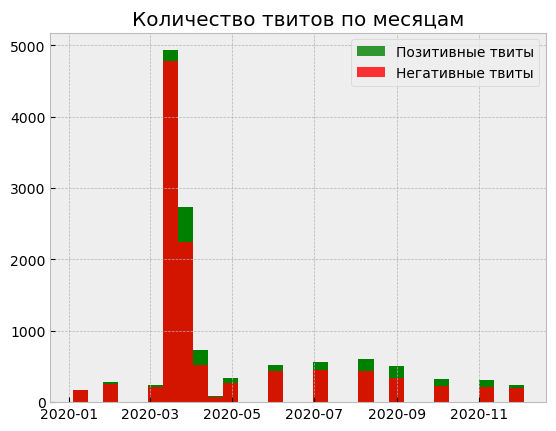

In [408]:
from matplotlib.pyplot import figure
figure(figsize=(30, 10), dpi=80)
plt.style.use('bmh')
def plot_beta_hist(ax, a, b):
    ax.hist(x = train[train['Emotion'] == 1]['TweetAt'],
            histtype="stepfilled", bins=30, alpha=0.8, color='green')
    ax.hist(x = train[train['Emotion'] == 0]['TweetAt'],
            histtype="stepfilled", bins=30, alpha=0.8, color='red')


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("Количество твитов по месяцам")
plt.legend(["Позитивные твиты", "Негативные твиты"], loc="upper right")
plt.show()

По графику видно, что позитивных и негативных твитов каждый день примерно равные пропорции. Поэтому этот признак, по моему менению, не будет полезен для анализа в данном случае.

**Поработайте с признаком Location в обучающей выборке. Сколько уникальных значений?**

In [409]:
#переходим к анализу признака Location:

In [411]:
train['Location'].nunique()

7950

большое количество уникальных значений

**Постройте гистограмму топ-10 по популярности местоположений (исключая Unknown)**

Text(0.5, 1.0, 'Топ-10 популярных локаций авторов твитов')

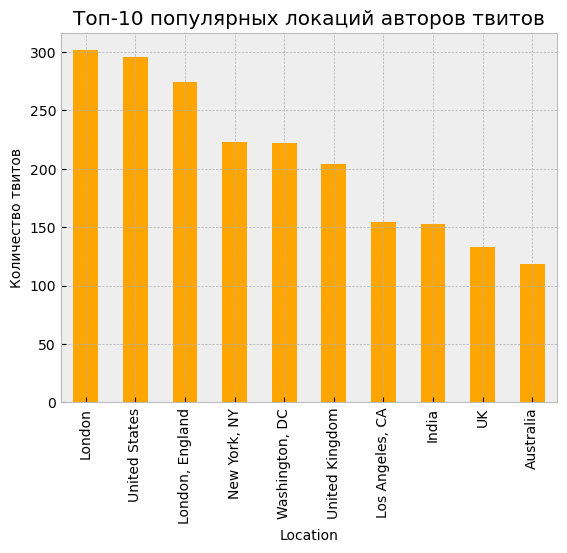

In [417]:
popular_locations = (train['Location'].value_counts())[1:11]

popular_locations.plot(kind='bar', color='orange')
plt.ylabel("Количество твитов")
plt.title("Топ-10 популярных локаций авторов твитов")

In [418]:
#создадим новый столбец с более общими локациями

Видно, что многие местоположения включают в себя более точное название места, чем другие (Например, у некоторых стоит London, UK; а у некоторых просто UK или United Kingdom).

Создайте новый признак WiderLocation, который содержит самое широкое местоположение (например, из London, UK должно получиться UK). Сколько уникальных категорий теперь? Постройте аналогичную гистограмму.

In [423]:
train['WiderLocation'] = train.apply(lambda row: row.Location.split(' ')[-1] if len(row.Location.split(' ')) > 1 else row.Location.split(' ')[0], axis = 1)
 
# Print the DataFrame after addition
# of new column
train

UserName  ScreenName                        Location    TweetAt  \
25621     35178       80130                         Unknown 2020-06-04   
30135     40819       85771                   Boston, MA HQ 2020-10-04   
28899     39249       84201                           India 2020-09-04   
5989      11068       56020             Mayfair, London, UK 2020-03-19   
4367       9109       54061                             WNC 2020-03-18   
...         ...         ...                             ...        ...   
20757     29120       74072                         Unknown 2020-03-31   
32103     43291       88243  Waterville, Ireland Austin, TX 2020-04-13   
30403     41159       86111            Mumbai , Delhi India 2020-10-04   
21243     29702       74654                         Unknown 2020-01-04   
2732       7104       52056                         Unknown 2020-03-18   

                                           OriginalTweet  Emotion  \
25621  Why we still want to buy so much stuff during ...        1   
30135  With driving even more usage a strong strategy...        1   
28899  @Canon_India I am very happy.. Great job by @C...        1   
5989   The U.S national debt will likely exceed $30 T...        0   
4367   Finally got to the grocery store. Honestly, wh...        1   
...                                                  ...      ...   
20757  Football is in ruins right now.When it will re...        0   
32103  Hand sanitizer made here on the Skellig Coast!...        1   
30403  An initiative  taken by our  @GOLDENINITIATI1 ...        1   
21243  Vile premiership players demanding full wages ...        0   
2732   Just wondering why we arenÂt screening at the...        1   

      WiderLocation  
25621       Unknown  
30135            HQ  
28899         India  
5989             UK  
4367            WNC  
...             ...  
20757       Unknown  
32103            TX  
30403         India  
21243       Unknown  
2732        Unknown  

[23410 rows x 7 columns]

In [424]:
train.WiderLocation.unique()

array(['Unknown', 'HQ', 'India', ..., 'Noord-Brabant', 'hyderabad',
       'NIGERIA'], dtype=object)

In [425]:
len(train.WiderLocation.unique())

2980

теперь уникальных категорий намного меньше, это должно улучшить качество анализа

Text(0.5, 1.0, 'Топ-10 популярных локаций авторов твитов')

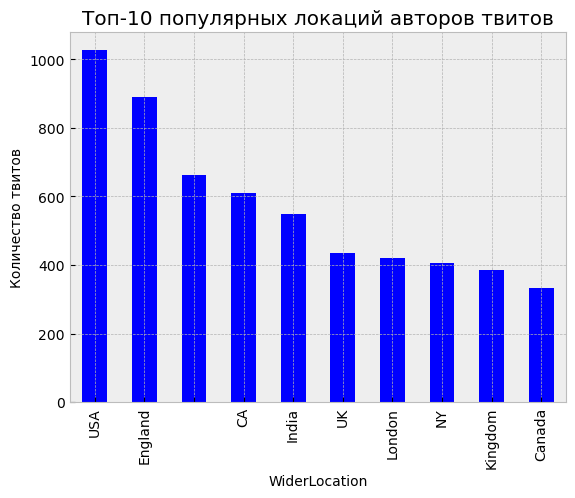

In [433]:
popular_wider_locations = (train['WiderLocation'].value_counts())[1:11]

popular_wider_locations.plot(kind='bar', color='blue')
plt.ylabel("Количество твитов")
plt.title("Топ-10 популярных локаций авторов твитов")

In [435]:
from sklearn.preprocessing import OneHotEncoder

In [447]:
train = train.loc[:, :'Emotion']

In [448]:
train.head()

UserName  ScreenName             Location    TweetAt  \
25621     35178       80130              Unknown 2020-06-04   
30135     40819       85771        Boston, MA HQ 2020-10-04   
28899     39249       84201                India 2020-09-04   
5989      11068       56020  Mayfair, London, UK 2020-03-19   
4367       9109       54061                  WNC 2020-03-18   

                                           OriginalTweet  Emotion  
25621  Why we still want to buy so much stuff during ...        1  
30135  With driving even more usage a strong strategy...        1  
28899  @Canon_India I am very happy.. Great job by @C...        1  
5989   The U.S national debt will likely exceed $30 T...        0  
4367   Finally got to the grocery store. Honestly, wh...        1

In [449]:
train['WiderLocation'] = train.apply(lambda row: row.Location.split(' ')[-1] if len(row.Location.split(' ')) > 1 else row.Location.split(' ')[0], axis = 1)
 
# Print the DataFrame after addition
# of new column
train

UserName  ScreenName                        Location    TweetAt  \
25621     35178       80130                         Unknown 2020-06-04   
30135     40819       85771                   Boston, MA HQ 2020-10-04   
28899     39249       84201                           India 2020-09-04   
5989      11068       56020             Mayfair, London, UK 2020-03-19   
4367       9109       54061                             WNC 2020-03-18   
...         ...         ...                             ...        ...   
20757     29120       74072                         Unknown 2020-03-31   
32103     43291       88243  Waterville, Ireland Austin, TX 2020-04-13   
30403     41159       86111            Mumbai , Delhi India 2020-10-04   
21243     29702       74654                         Unknown 2020-01-04   
2732       7104       52056                         Unknown 2020-03-18   

                                           OriginalTweet  Emotion  \
25621  Why we still want to buy so much stuff during ...        1   
30135  With driving even more usage a strong strategy...        1   
28899  @Canon_India I am very happy.. Great job by @C...        1   
5989   The U.S national debt will likely exceed $30 T...        0   
4367   Finally got to the grocery store. Honestly, wh...        1   
...                                                  ...      ...   
20757  Football is in ruins right now.When it will re...        0   
32103  Hand sanitizer made here on the Skellig Coast!...        1   
30403  An initiative  taken by our  @GOLDENINITIATI1 ...        1   
21243  Vile premiership players demanding full wages ...        0   
2732   Just wondering why we arenÂt screening at the...        1   

      WiderLocation  
25621       Unknown  
30135            HQ  
28899         India  
5989             UK  
4367            WNC  
...             ...  
20757       Unknown  
32103            TX  
30403         India  
21243       Unknown  
2732        Unknown  

[23410 rows x 7 columns]

In [455]:
train.head()

Unknown    USA  England            CA  India     UK  London     NY  \
0     True  False    False  False  False  False  False   False  False   
1    False  False    False  False  False  False  False   False  False   
2    False  False    False  False  False   True  False   False  False   
3    False  False    False  False  False  False   True   False  False   
4    False  False    False  False  False  False  False   False  False   

   Kingdom  ...  county    bed  ontario  africa  Wirral  Detective   Mind  \
0    False  ...   False  False    False   False   False      False  False   
1    False  ...   False  False    False   False   False      False  False   
2    False  ...   False  False    False   False   False      False  False   
3    False  ...   False  False    False   False   False      False  False   
4    False  ...   False  False    False   False   False      False  False   

   Cardiff  Trees  NYC-DC  
0    False  False   False  
1    False  False   False  
2    False  False   False  
3    False  False   False  
4    False  False   False  

[5 rows x 901 columns]

In [456]:
#здесь я потерял исходный датафрейм train и не понял как его восстановить(((